In [1]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt

#data = pd.read_excel (r'C:\Users\Thierry\Documents\Studie\TU Delft Applied Physics\CS4195 Modeling and Data Analysis in Complex Networks\Assignment1\manufacturing_emails_temporal_network.xlsx')
data = pd.read_excel (r'../manufacturing_emails_temporal_network.xlsx')
#data = pd.read_excel (r'C:\Users\rixtb\Documents\Master\Data analysis\Datasets\oefenset.xlsx')

#%% A
Nnodes = np.max([data['node1'].max(), data['node2'].max()])
G = data.drop(['timestamp'],axis=1); B = data.drop_duplicates()

col1 = B['node1']; col1 = col1.tolist()
col2 = B['node2']; col2 = col2.tolist()
col3 = data['timestamp']; col3 = col3.tolist()

shuff = np.random.randint(0,len(col1),len(col3))

G3 = np.zeros([len(col3),4],dtype=int)

for i in range(len(col3)):
    G3[i,:]=np.array([col1[shuff[i]],col2[shuff[i]],col3[i],shuff[i]]) #the last shuff[i] is to save the number of the link pair chosen

In [85]:
#%% B
tmax = data.timestamp.max()
Infections = np.zeros([tmax,Nnodes])

start = timeit.default_timer()

Aoud = np.eye(Nnodes)
unit = np.eye(Nnodes)

for i in range(1,tmax+1):
    data_temp = G3[G3[:,2]==i]
    A = np.zeros([Nnodes,Nnodes])
    
    for j in range(len(data_temp)):
        A[data_temp[j,0]-1,data_temp[j,1]-1] = 1
        A[data_temp[j,1]-1,data_temp[j,0]-1] = 1
    
    Inf = np.dot(A+unit,Aoud)
    Inf[Inf>0]=1
    Aoud = Inf
    Infections[i-1,:] = np.sum(Inf, axis=0)
        
stop = timeit.default_timer()
print('Time:',stop-start)

Time: 41.28950831480324


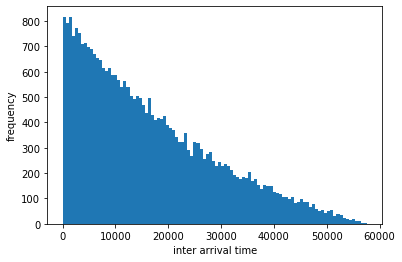

In [30]:
#%% creating the inter-arrival time histogram
dT = []
for i in range(len(B)):
    delta_t = np.array([G3[G3[:,3]==i][:,2]])
    delta_t = np.sort(delta_t)  #sorted list of all timestamps that belong to node i
    if len(delta_t[0,:])>1: #must be at least 2 values
        for j in range(len(delta_t[0,:])-1):
            diff = delta_t[0,j+1]-delta_t[0,j] #time difference
            dT = np.append(dT,diff) #one gigantic list of timedifferences
            
plt.hist(dT,100)
plt.xlabel('inter arrival time')
plt.ylabel('frequency')
plt.show()

In [85]:
len(G3_rm)/len(B)

0.035962129774796125

In [76]:
G3_temp = G3[:,:2]
G3_temp = pd.DataFrame(G3_temp,index=G3_temp[:,0])
G3_rm =G3_temp.drop_duplicates()

col1 = G3_rm[0]; col2 = G3_rm[1]
col1 = col1.tolist(); col2 = col2.tolist()

Nlinks = len(G3_rm)
for i in range(Nlinks):
    g.add_edges([(col1[i]-1,col2[i]-1)])

NameError: name 'g' is not defined

In [41]:
x=[[1, 2], [3, 1], [2, 5], [6, 7], [8,6]]
y=[1,2]
if y not in x:
    print(y)

In [89]:
len(G3)

82876